In [16]:
#!L
import time
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from torchvision.datasets import FashionMNIST


from linearized_nns.pytorch_impl.estimators import SgdEstimator
from linearized_nns.pytorch_impl.nns import Myrtle5, Myrtle7, Myrtle10
from linearized_nns.pytorch_impl import ClassifierTraining
from linearized_nns.pytorch_impl.matrix_exp import matrix_exp, compute_exp_term
from linearized_nns.pytorch_impl.nns.utils import to_one_hot, print_sizes
from linearized_nns.pytorch_impl.nns.primitives import Conv, Flatten, Normalize, ReLU2
from linearized_nns.from_neural_kernels import to_zca, CustomTensorDataset, get_cifar_zca

In [8]:
#!L

X_train, y_train, X_test, y_test = get_cifar_zca()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
#!L
device = torch.device('cuda')

In [ ]:
#!L

torch.manual_seed(0)

cifar_train = CustomTensorDataset(torch.tensor(X_train), torch.tensor(y_train, dtype=torch.long), transform='all')
cifar_test  = CustomTensorDataset(torch.tensor(X_test), torch.tensor(y_test, dtype=torch.long), transform=None)

train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=128, shuffle=True)
test_loader  = torch.utils.data.DataLoader(cifar_test,  batch_size=128, shuffle=True)

device

In [ ]:
#!L
%state_exclude model

model = Myrtle10(num_filters=32, groups=1).to(device)
learning_rate = 0.5

estimator = SgdEstimator(model, nn.CrossEntropyLoss(), learning_rate)
training  = ClassifierTraining(estimator, device)

training.train(train_loader, test_loader, num_epochs=60, learning_rate=learning_rate)

epoch 0/60, 0s since start
epoch 1/60, 42s since start
epoch 2/60, 84s since start
epoch 3/60, 126s since start
epoch 4/60, 168s since start
epoch 5/60, 210s since start
epoch 6/60, 252s since start
epoch 7/60, 294s since start
epoch 8/60, 336s since start
epoch 9/60, 377s since start
epoch 10/60, 419s since start
epoch 11/60, 461s since start
epoch 12/60, 503s since start
epoch 13/60, 545s since start
epoch 14/60, 587s since start
epoch 15/60, 629s since start
epoch 16/60, 671s since start
epoch 17/60, 713s since start
epoch 18/60, 755s since start
epoch 19/60, 797s since start
epoch 20/60, 839s since start
epoch 21/60, 881s since start
epoch 22/60, 923s since start
epoch 23/60, 965s since start
epoch 24/60, 1007s since start
epoch 25/60, 1049s since start
epoch 26/60, 1091s since start
epoch 27/60, 1133s since start
epoch 28/60, 1175s since start
epoch 29/60, 1217s since start
epoch 30/60, 1259s since start
epoch 31/60, 1301s since start
epoch 32/60, 1343s since start
epoch 33/60, 13

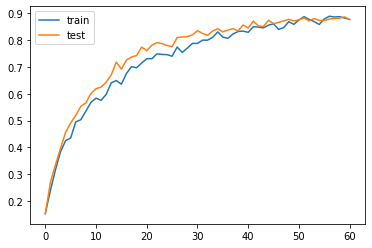

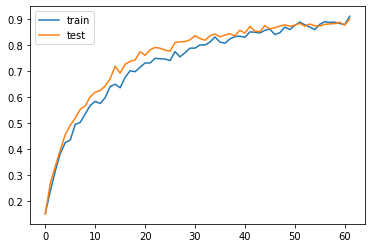

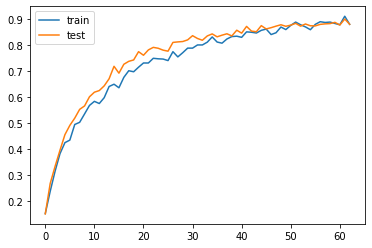

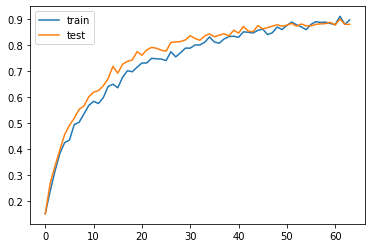

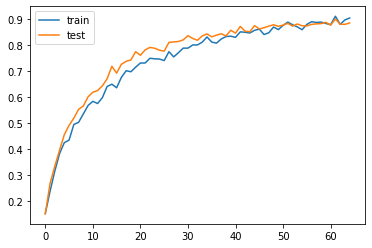

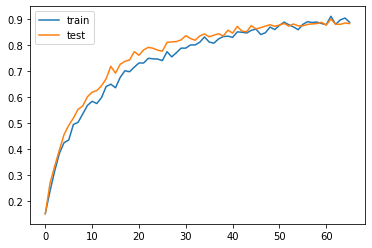

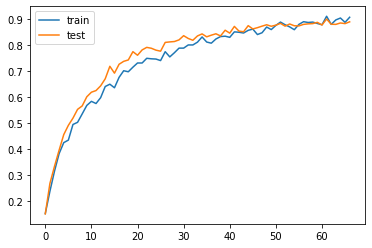

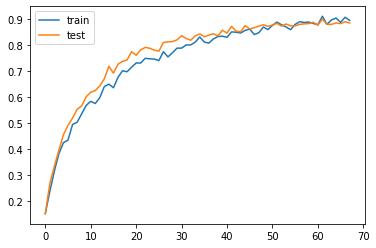

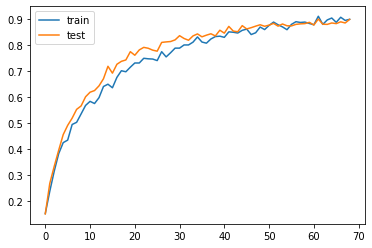

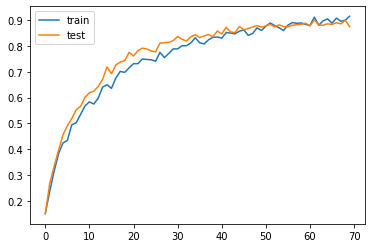

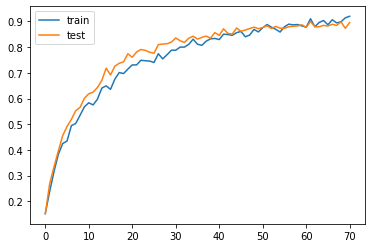

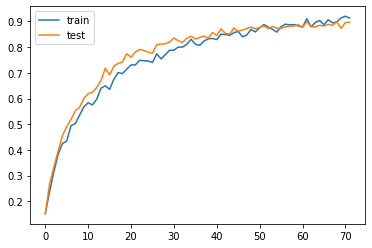

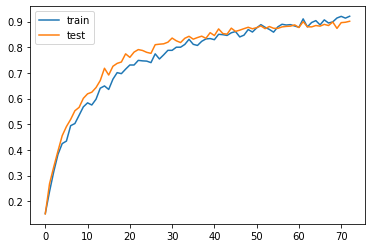

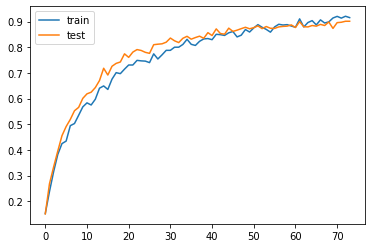

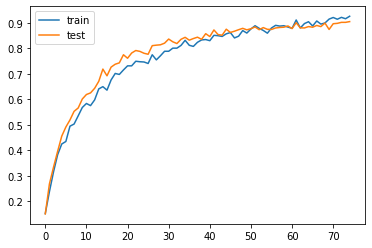

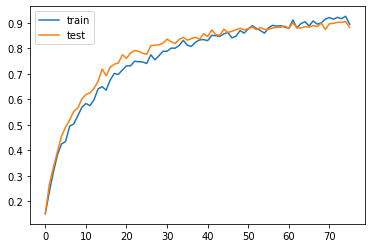

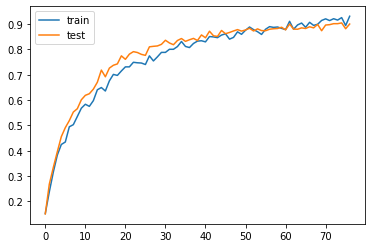

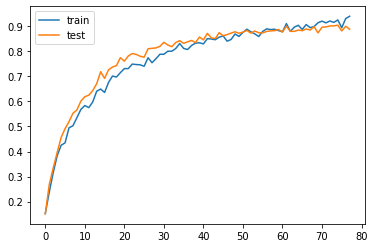

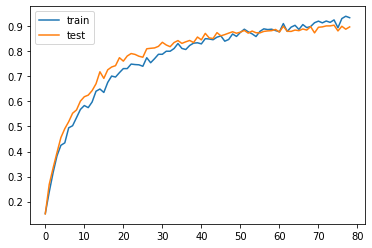

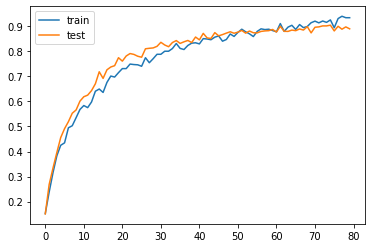

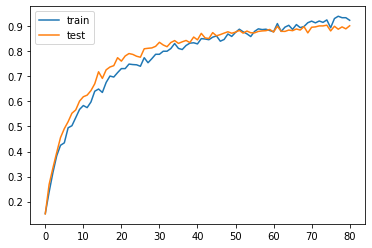

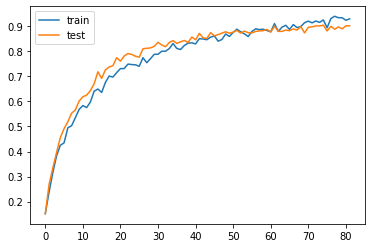

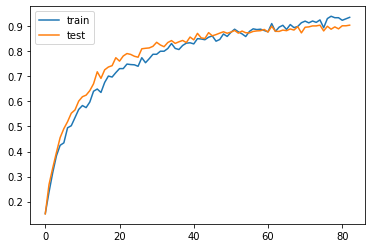

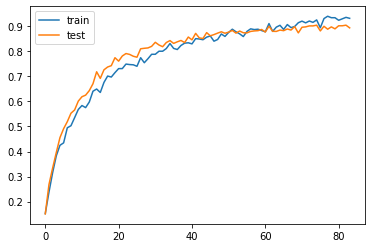

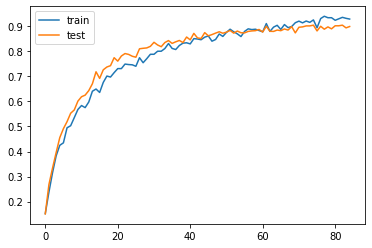

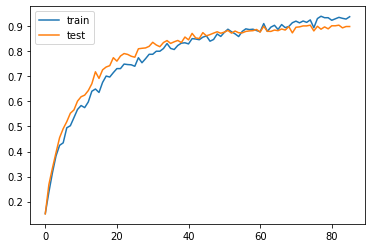

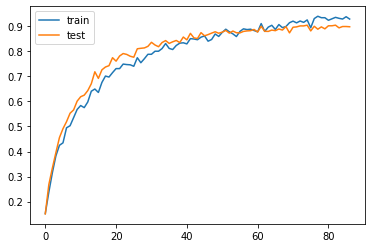

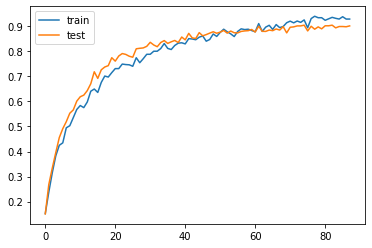

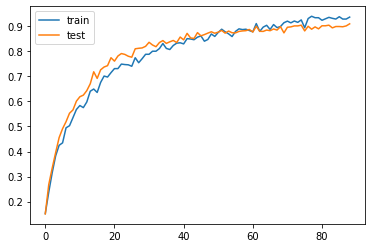

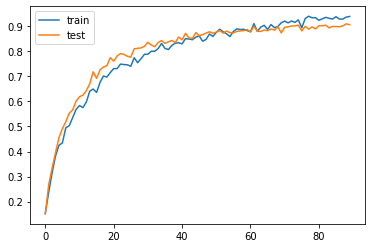

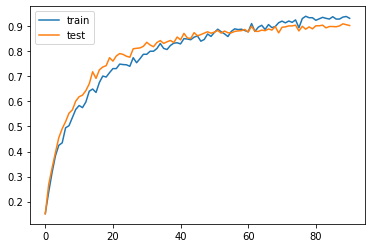

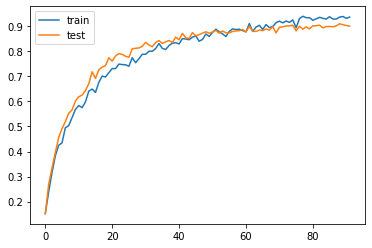

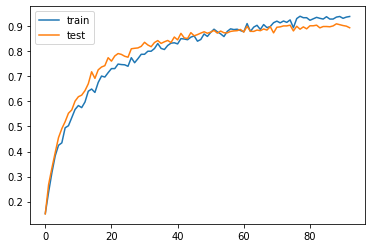

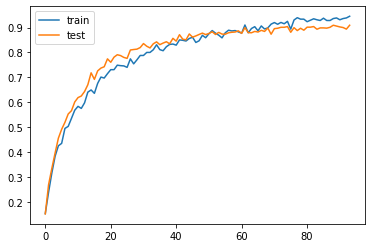

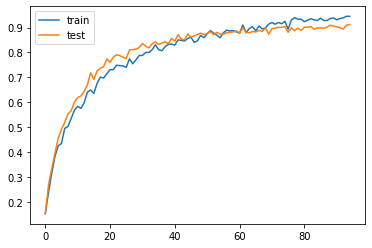

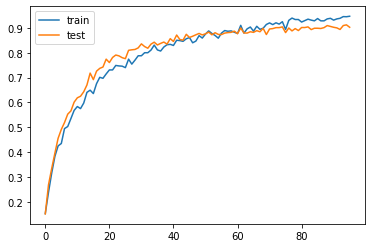

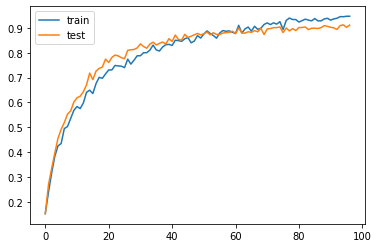

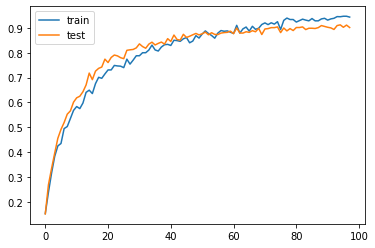

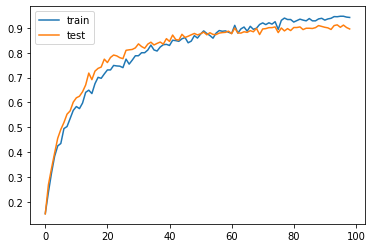

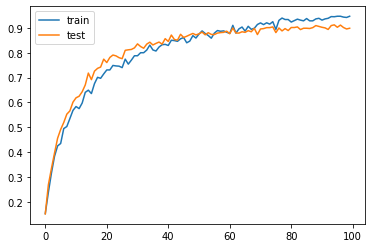

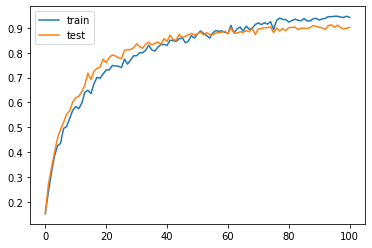

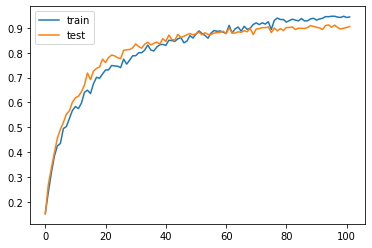

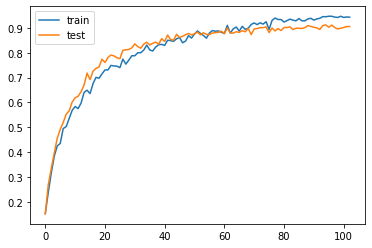

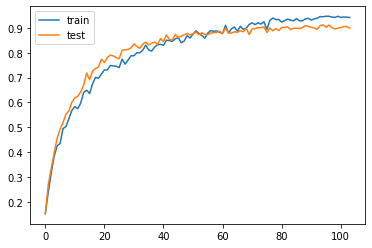

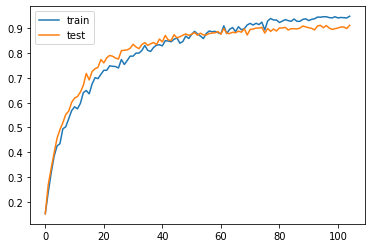

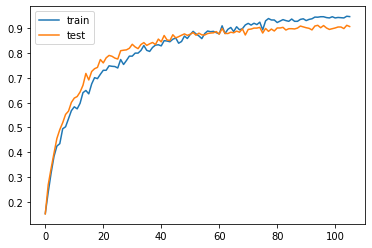

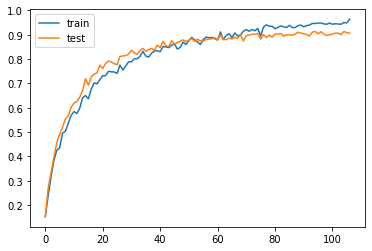

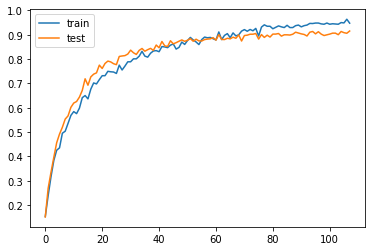

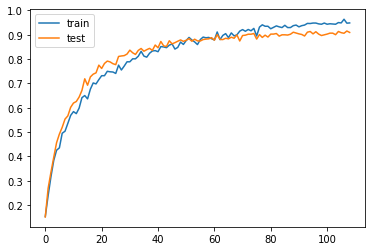

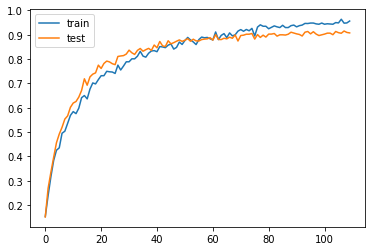

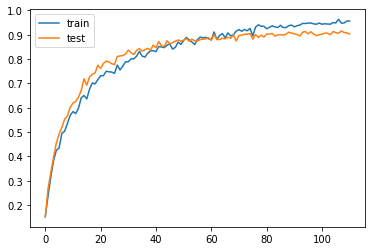

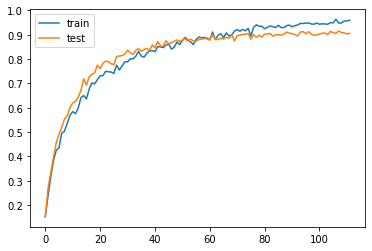

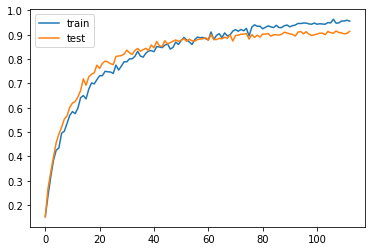

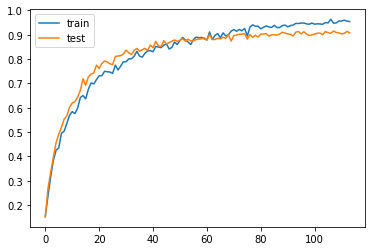

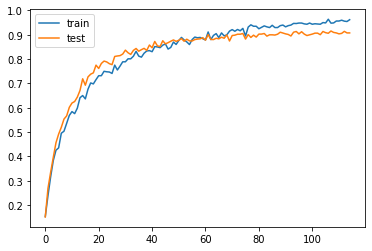

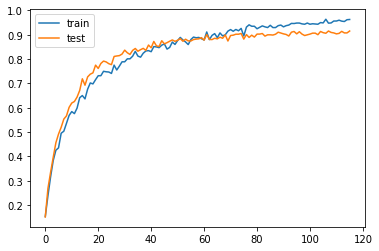

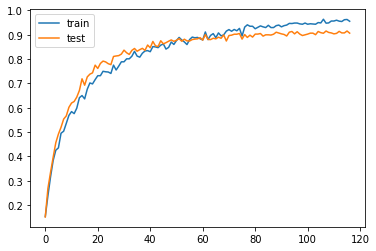

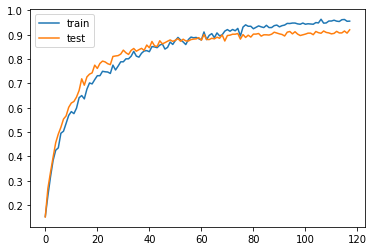

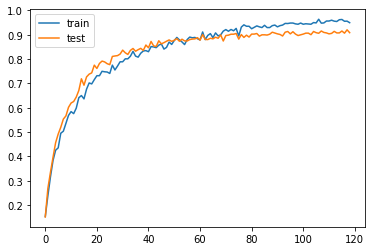

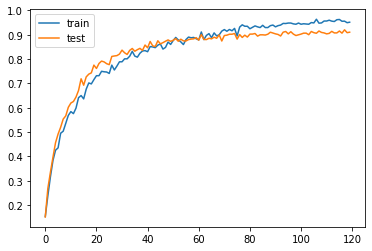

In [17]:
#!L
training.train(train_loader, test_loader, num_epochs=60, learning_rate=learning_rate)

epoch 0/60, 0s since start
epoch 1/60, 42s since start
epoch 2/60, 84s since start
epoch 3/60, 126s since start
epoch 4/60, 168s since start
epoch 5/60, 210s since start
epoch 6/60, 252s since start
epoch 7/60, 294s since start
epoch 8/60, 336s since start
epoch 9/60, 378s since start
epoch 10/60, 420s since start
epoch 11/60, 462s since start
epoch 12/60, 504s since start
epoch 13/60, 546s since start
epoch 14/60, 587s since start
epoch 15/60, 630s since start
epoch 16/60, 672s since start
epoch 17/60, 713s since start
epoch 18/60, 755s since start
epoch 19/60, 797s since start
epoch 20/60, 839s since start
epoch 21/60, 881s since start
epoch 22/60, 923s since start
epoch 23/60, 965s since start
epoch 24/60, 1007s since start
epoch 25/60, 1049s since start
epoch 26/60, 1091s since start
epoch 27/60, 1133s since start
epoch 28/60, 1175s since start
epoch 29/60, 1217s since start
epoch 30/60, 1259s since start
epoch 31/60, 1301s since start
epoch 32/60, 1343s since start
epoch 33/60, 13

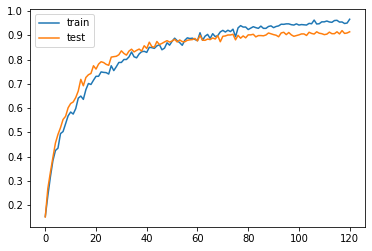

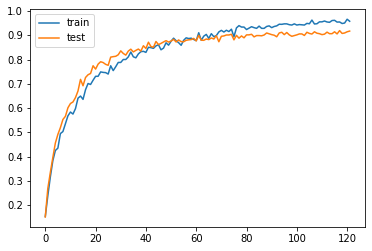

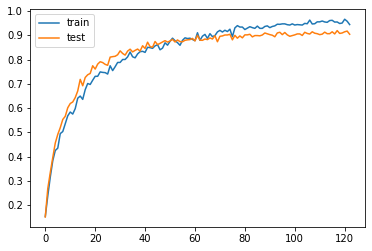

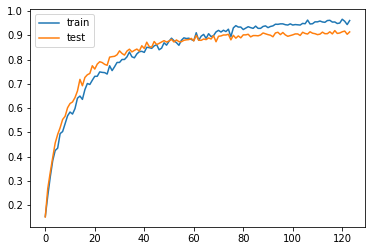

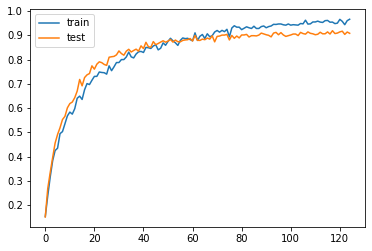

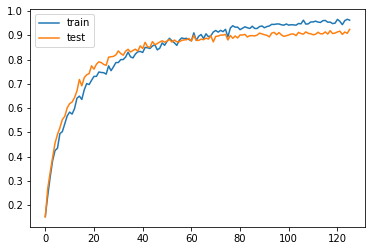

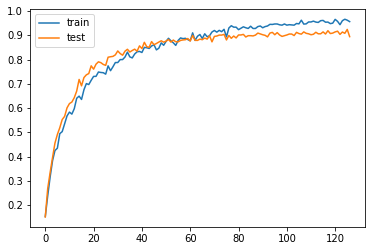

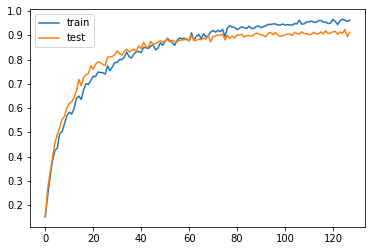

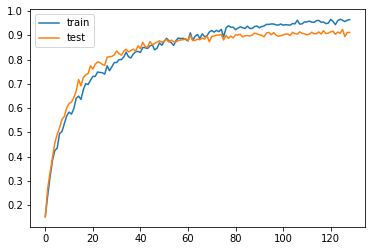

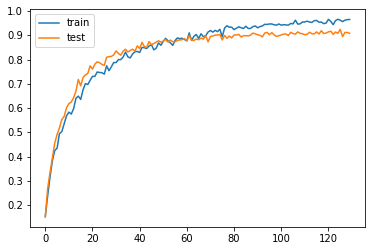

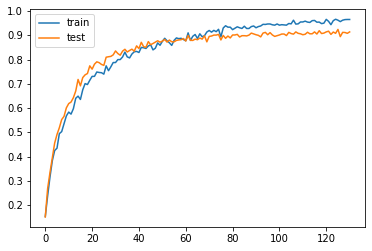

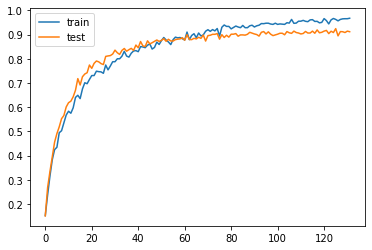

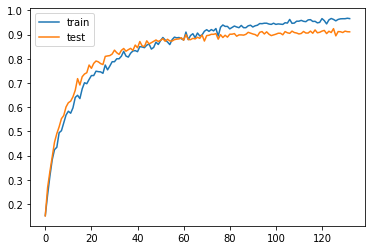

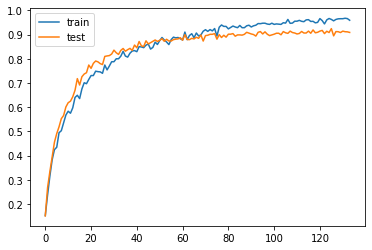

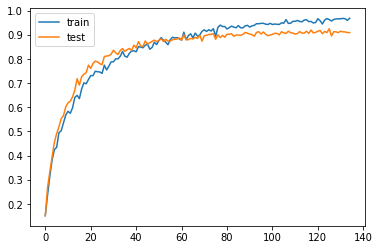

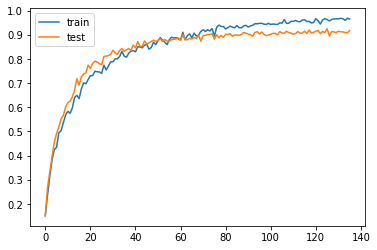

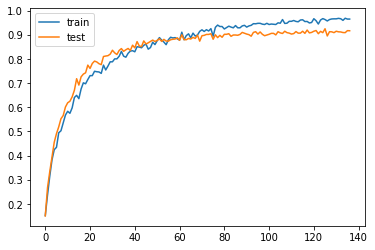

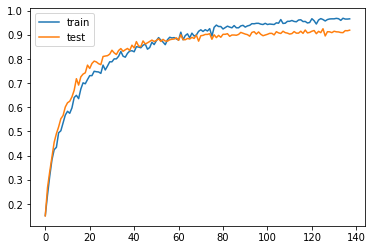

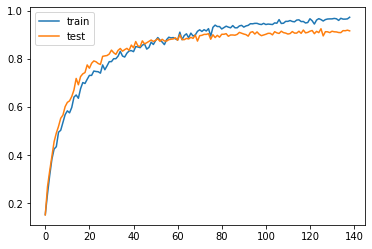

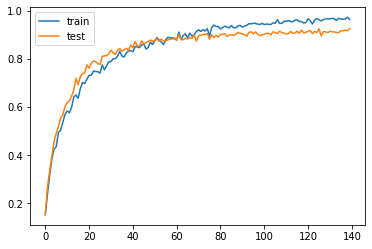

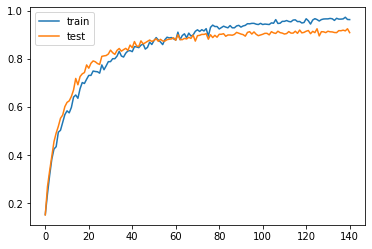

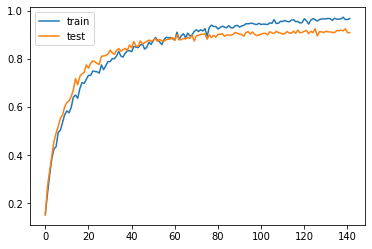

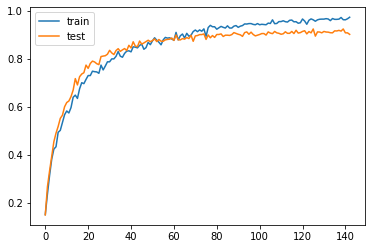

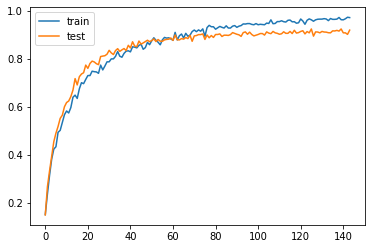

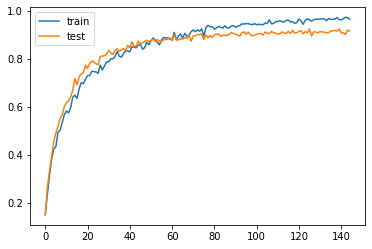

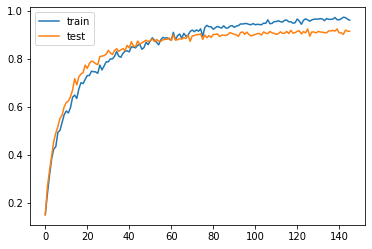

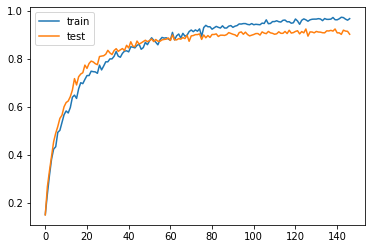

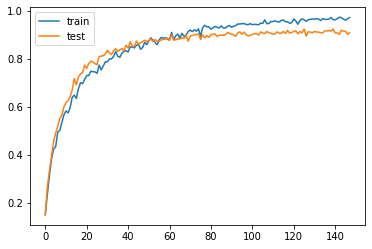

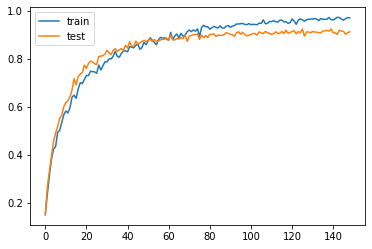

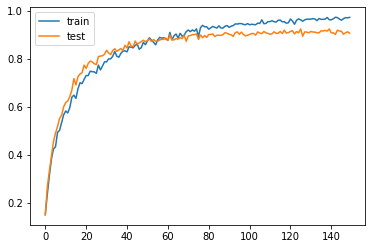

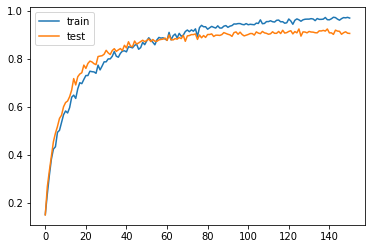

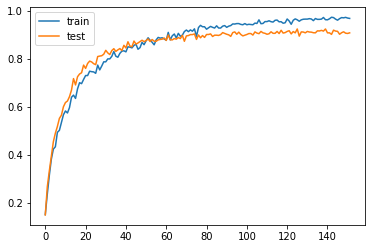

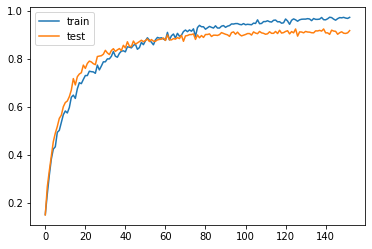

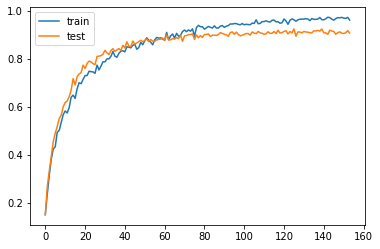

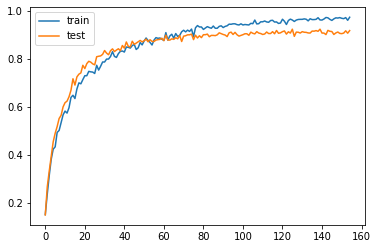

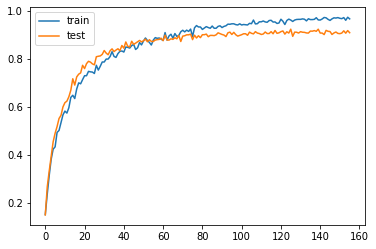

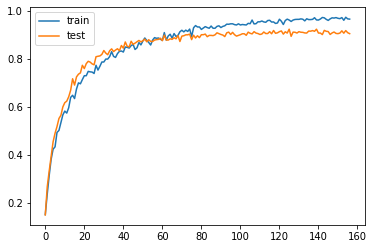

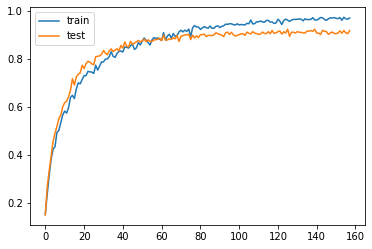

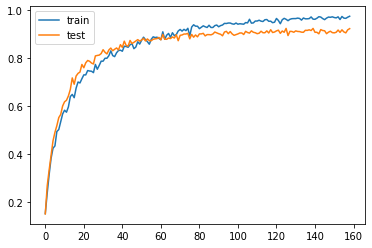

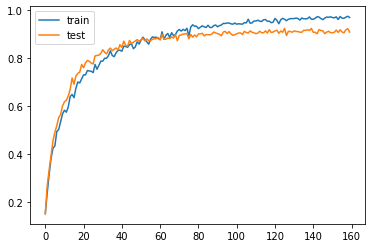

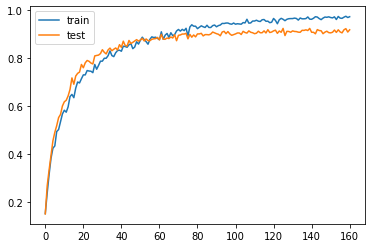

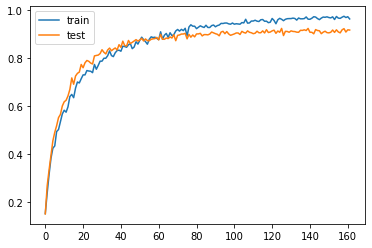

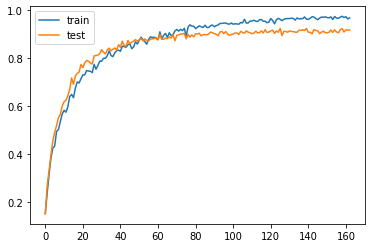

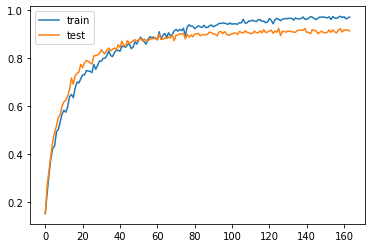

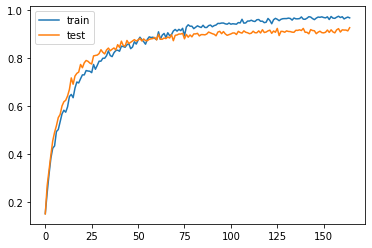

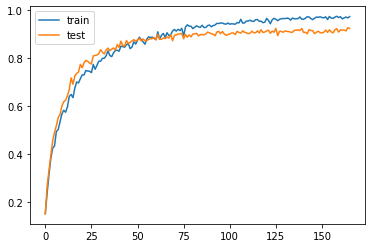

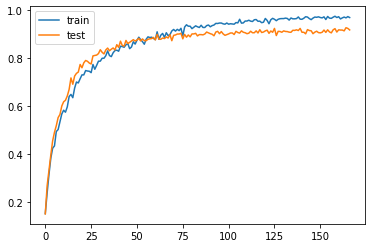

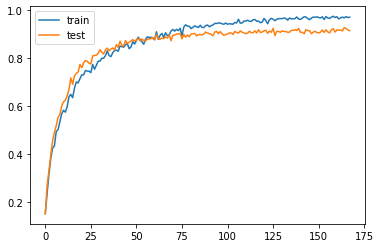

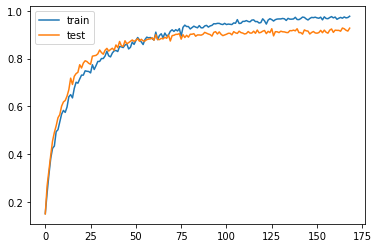

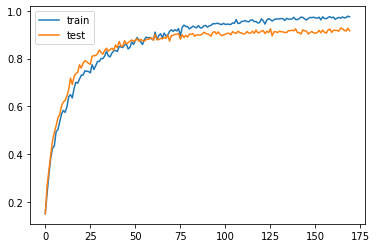

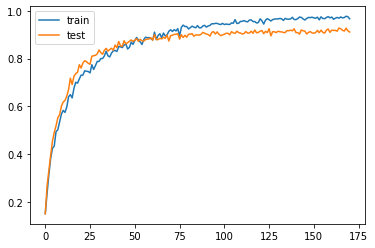

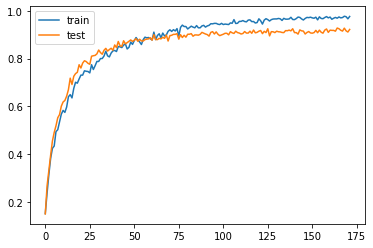

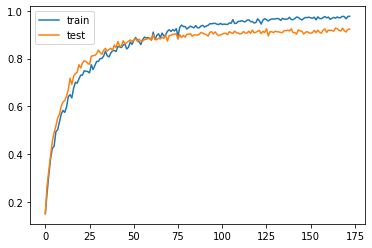

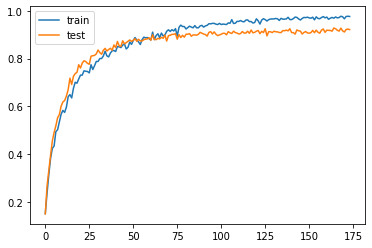

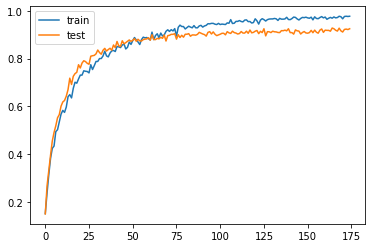

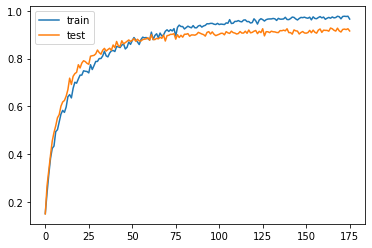

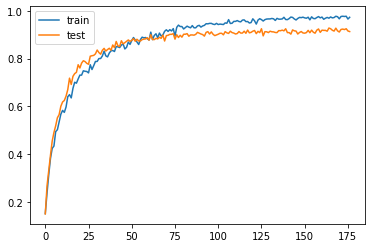

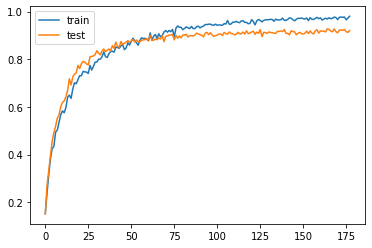

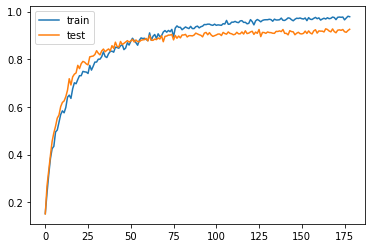

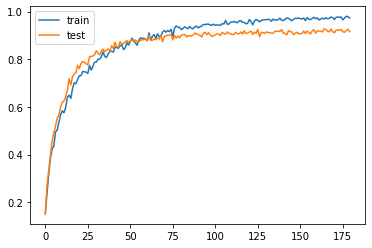

In [18]:
#!L
training.train(train_loader, test_loader, num_epochs=60, learning_rate=learning_rate)